In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plot
import numpy as np # álgebra linear
import os # acesso ao diretório
import pandas as pd # processamento dos dados .csv
import math
from starter_pack.func_analysis import plotPerColumnDistribution, plotCorrelationMatrix, plotScatterMatrix

/home/rafatokairin/uni-programs/ic/mass_case_description_train_set.ipynb
/home/rafatokairin/uni-programs/ic/MIAS.ipynb
/home/rafatokairin/uni-programs/ic/calc_case_description_test_set.ipynb
/home/rafatokairin/uni-programs/ic/meta.ipynb
/home/rafatokairin/uni-programs/ic/dicom_info.ipynb
/home/rafatokairin/uni-programs/ic/__pycache__/func_analysis.cpython-310.pyc
/home/rafatokairin/uni-programs/ic/starter_pack/starter-cbis-ddsm-breast-cancer-image-eef73d6f-4.ipynb
/home/rafatokairin/uni-programs/ic/starter_pack/func_analysis.py
/home/rafatokairin/uni-programs/ic/starter_pack/__pycache__/func_analysis.cpython-310.pyc
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.225893167712705639706899641612088401339/1-235.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.2448529311758051613285357123953923871/1-227.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.192830829713156688526768249872322016275/1-142.jpg
/home/rafatokairin/uni-programs/i

### Vamos verificar 1st arquivo: /kaggle/input/csv/calc_case_description_test_set.csv

In [2]:
nRowsRead = 1000 # especifique 'None' se quiser ler o arquivo inteiro
# calc_case_description_test_set.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df1 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/calc_case_description_test_set.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'calc_case_description_test_set.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 326 rows and 14 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [3]:
df1.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [4]:
# dimensões do arquivo
df1.shape

(326, 14)

In [5]:
# informações do arquivo
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [6]:
df1.isnull().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

Verificar os valores únicos em cada coluna

In [7]:
valores_unicos = []
for i in df1.columns[0:15].tolist():
    print(i, ':', len(df1[i].astype(str).value_counts()))
    valores_unicos.append(len(df1[i].astype(str).value_counts()))

patient_id : 151
breast density : 5
left or right breast : 2
image view : 2
abnormality id : 5
abnormality type : 1
calc type : 21
calc distribution : 8
assessment : 5
pathology : 3
subtlety : 5
image file path : 284
cropped image file path : 326
ROI mask file path : 326


In [8]:
df1.describe()

,breast density,abnormality id,assessment,subtlety
count,326.000000,326.000000,326.000000,326.000000
mean,2.696319,1.214724,3.453988,3.319018
std,0.909667,0.529061,1.188159,1.188175
min,0.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

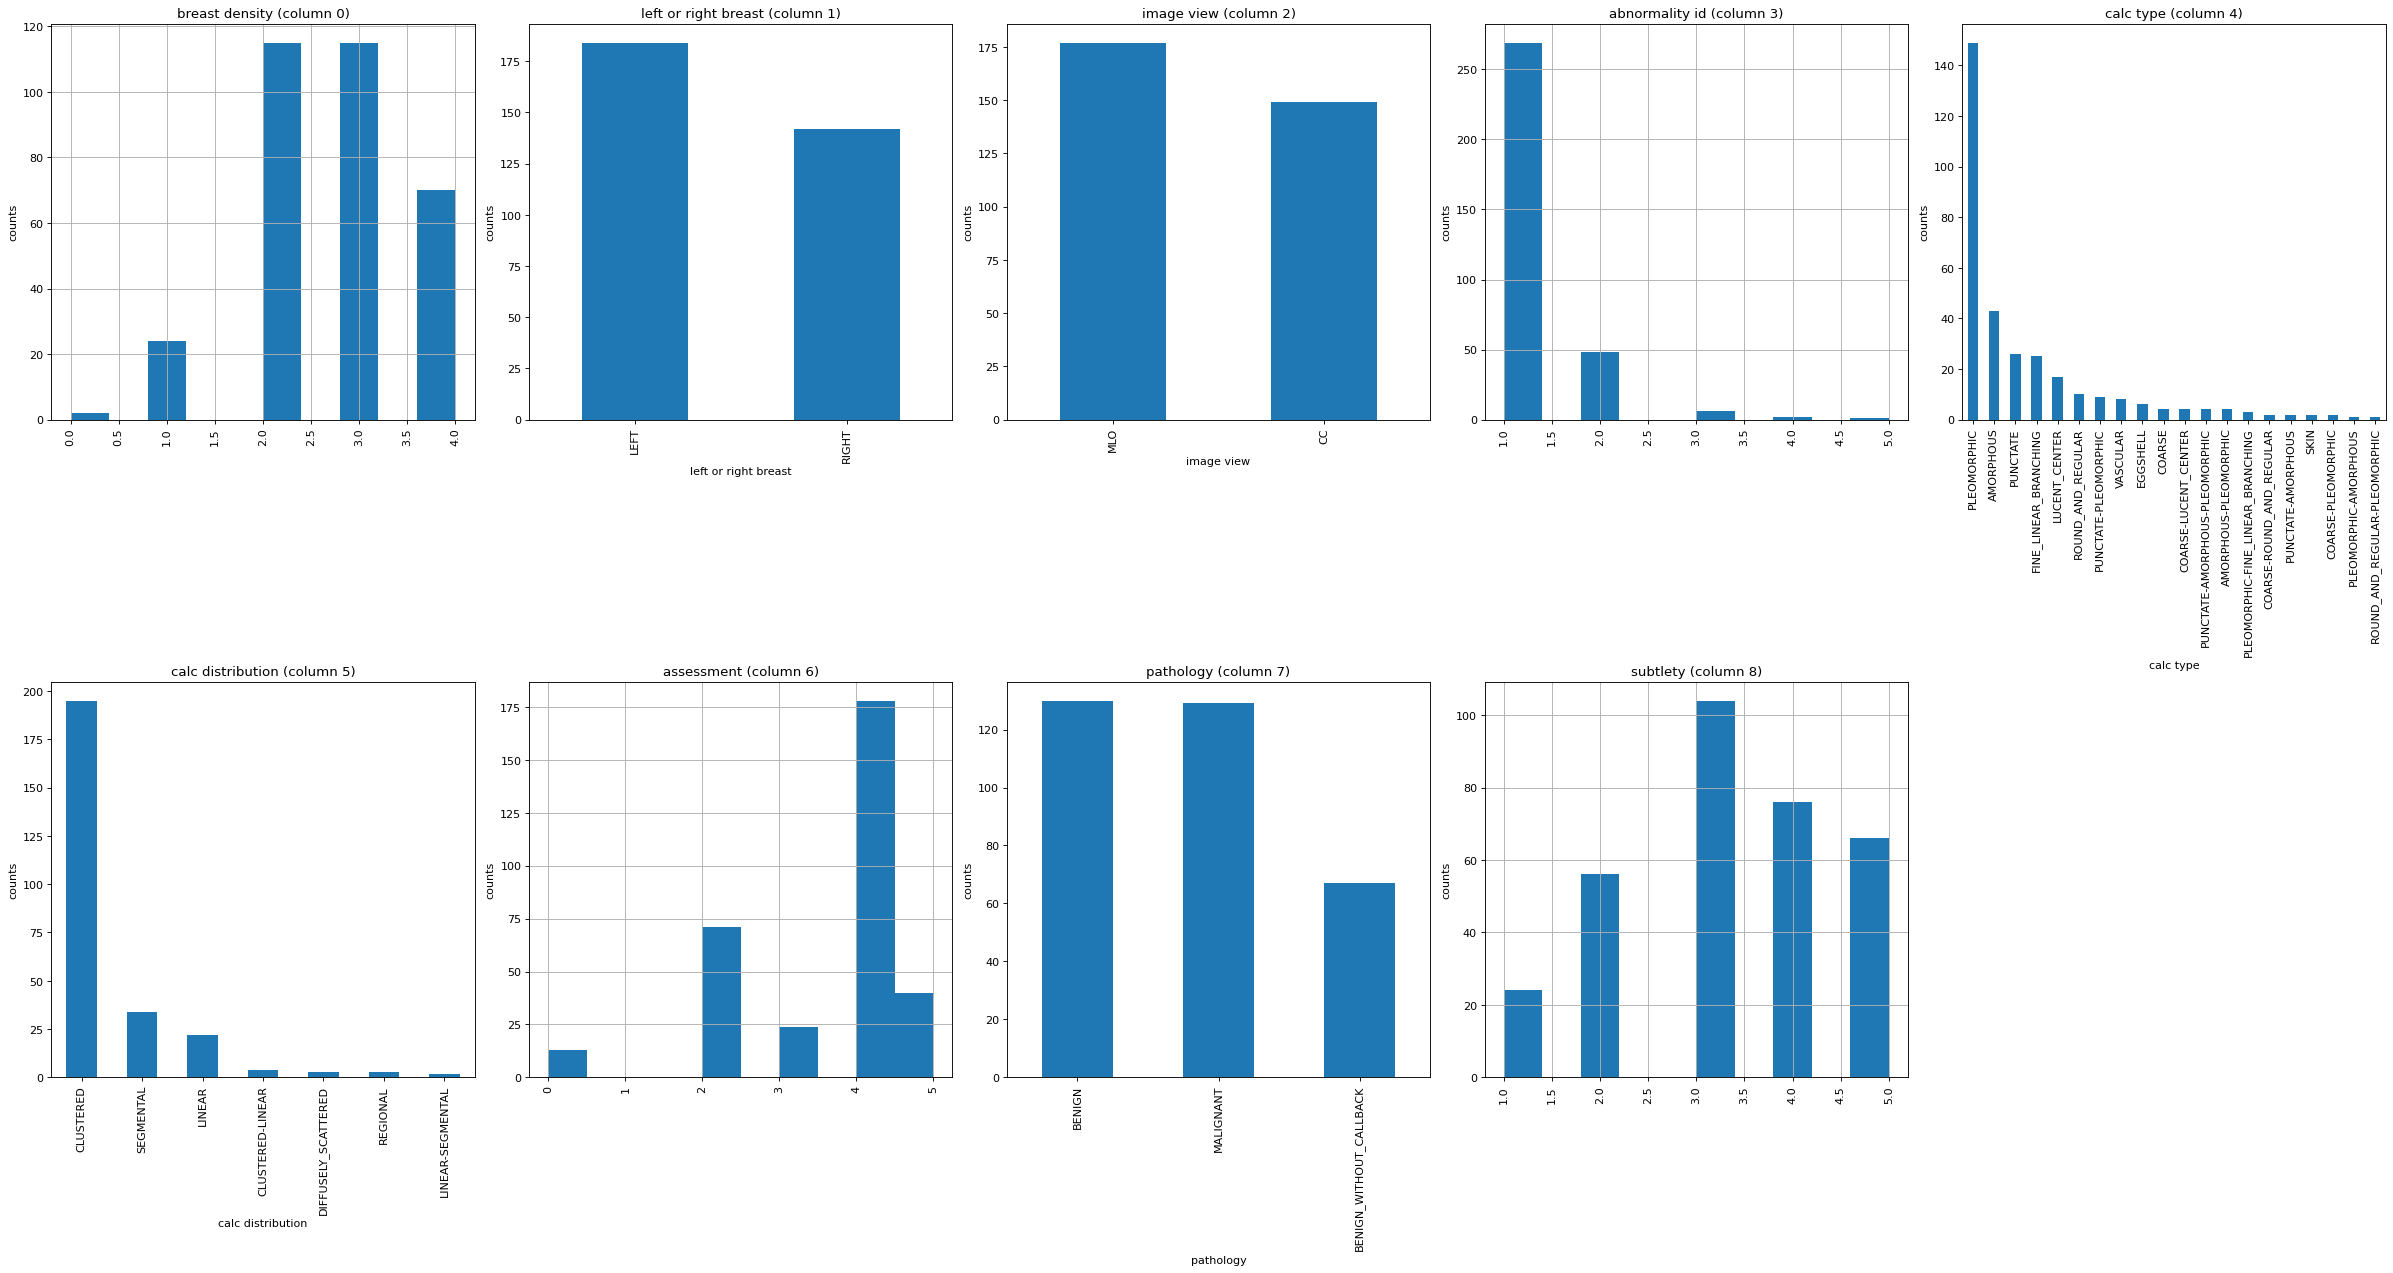

In [9]:
plotPerColumnDistribution(df1, 10, 5)

Matriz de correlação:

<Figure size 640x640 with 0 Axes>

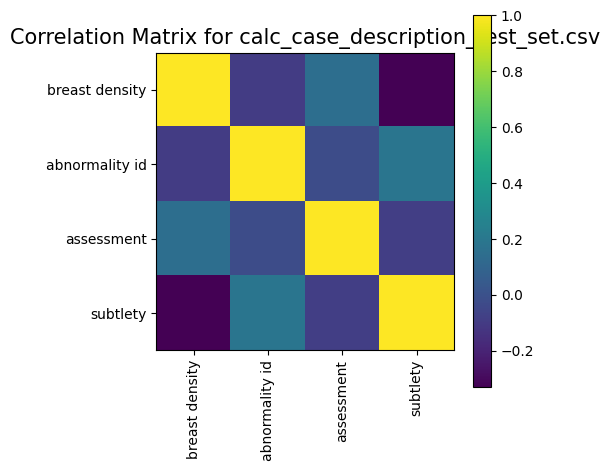

In [10]:
plotCorrelationMatrix(df1, 8)

Gráficos de dispersão e densidade:

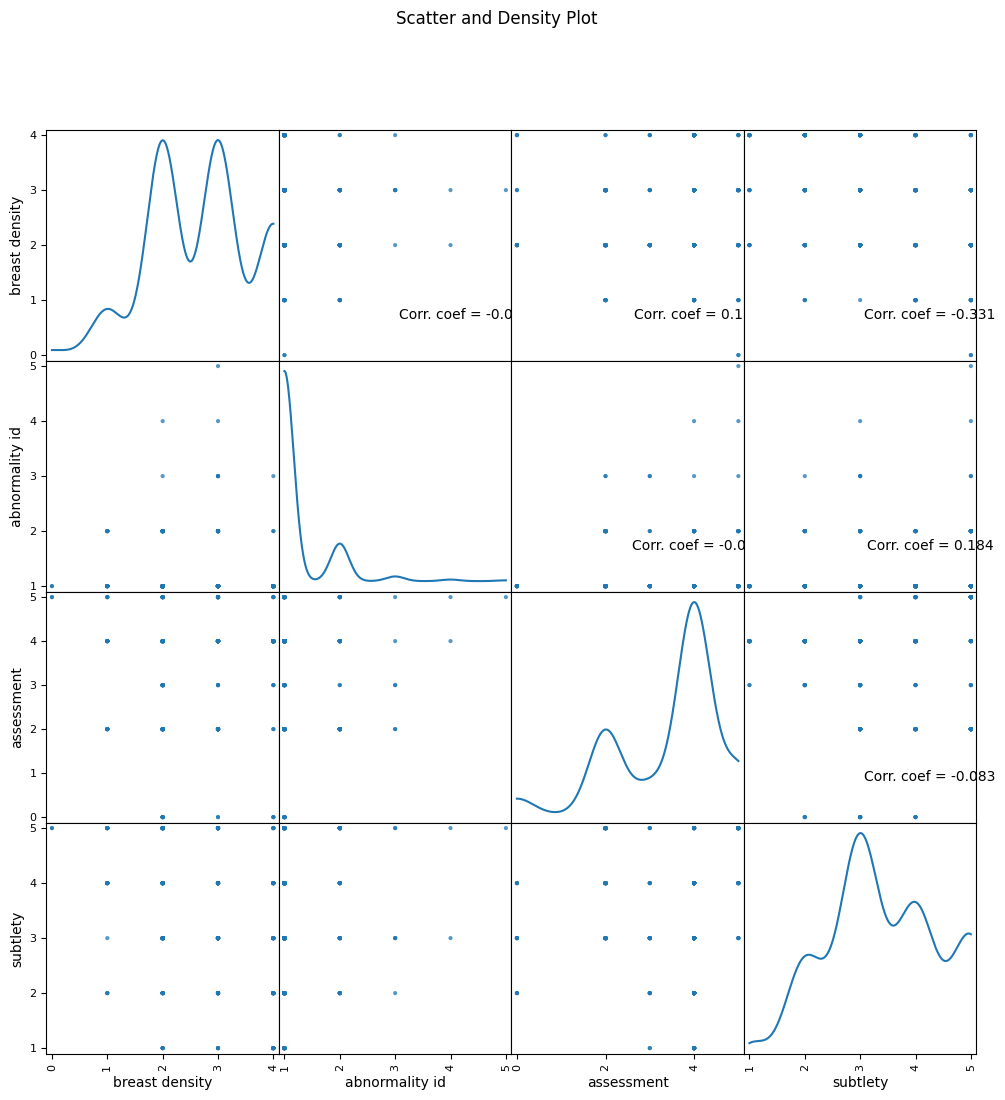

In [11]:
plotScatterMatrix(df1, 12, 10)